In [6]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# importing the data

In [8]:
df = pd.read_csv('gemstone.csv')

In [9]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [10]:
df.drop('id', axis=1, inplace=True)

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Dependent and Independent Data

In [14]:
# Independent Data's
X = df.drop('price', axis=1)

In [15]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77


In [16]:
# Dependent Data or Target Data
y = df['price']

In [17]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

# Categorical and Numerical columns

In [18]:
categorical_columns = X.select_dtypes(include='object').columns

In [19]:
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [20]:
numerical_columns = X.select_dtypes(exclude='object').columns

In [21]:
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

## Plotting graph 

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

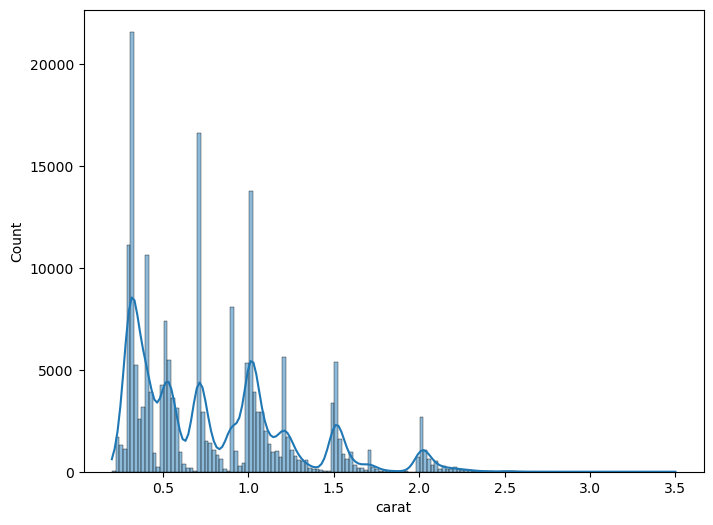

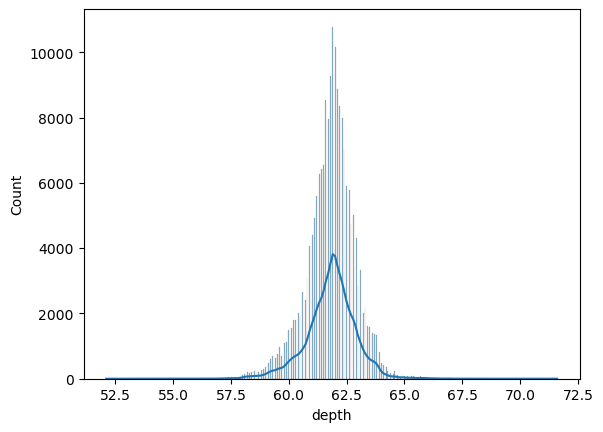

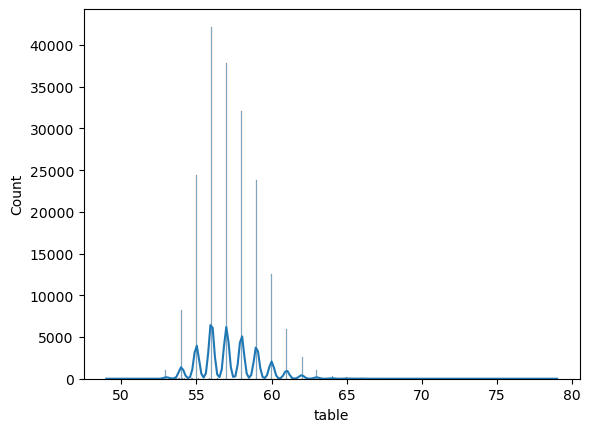

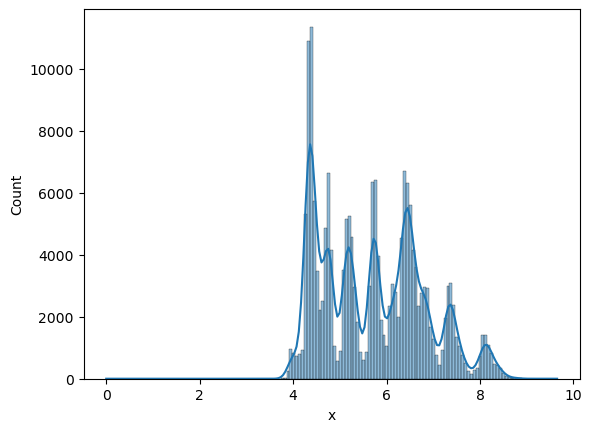

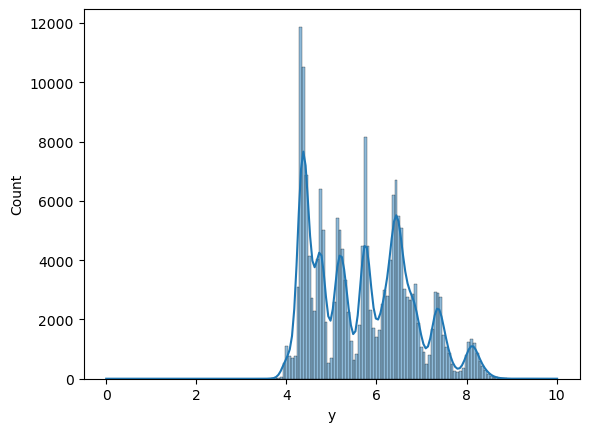

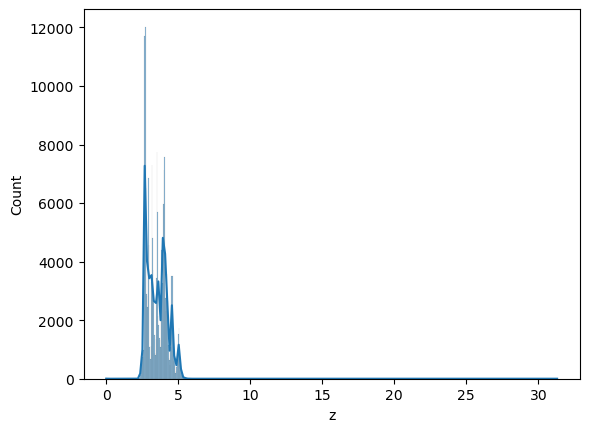

In [23]:
plt.figure(figsize=(8,6))
for column in numerical_columns:
    sns.histplot(data=df, x=column, kde=True)
    plt.show()

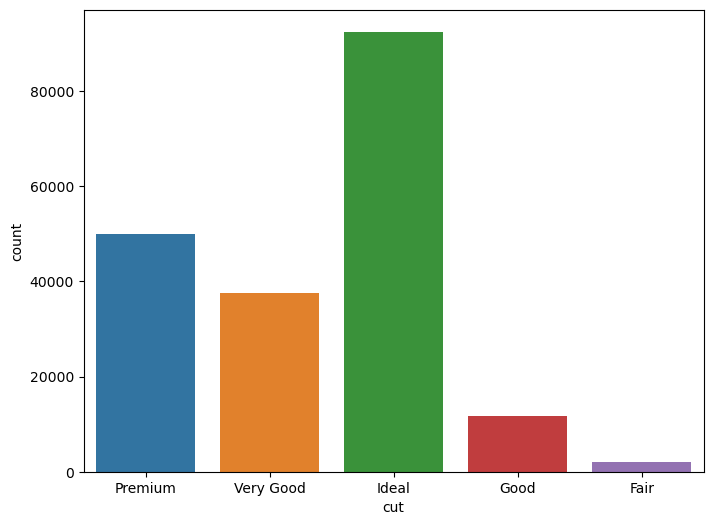

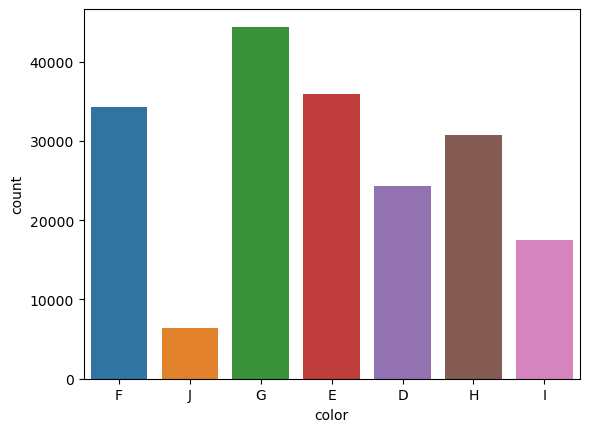

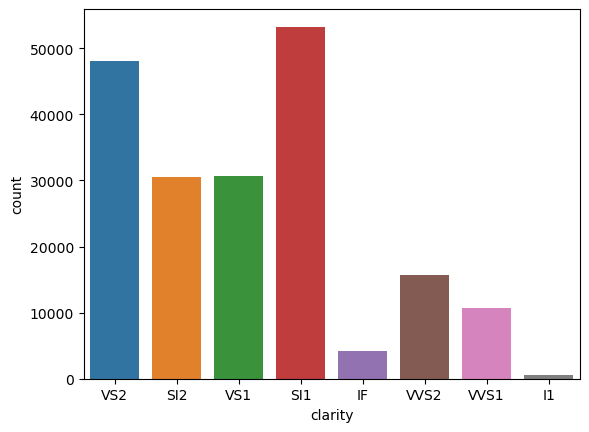

In [24]:
plt.figure(figsize=(8,6))
for column in categorical_columns:
    sns.countplot(data=df, x=column)
    plt.show()

<Axes: >

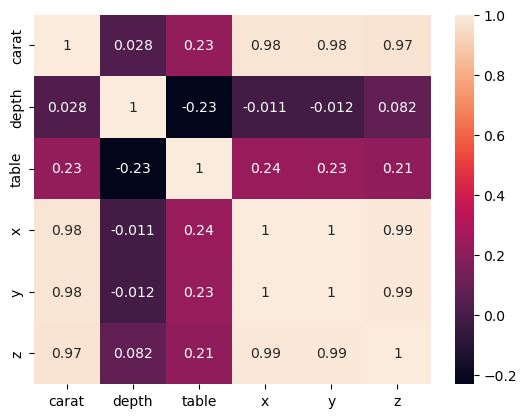

In [25]:
sns.heatmap(data=df[numerical_columns].corr(), annot=True)

# Model training

pip install scikit-learn

if above code doesnot work use
pip3 install scikit-learn
!pip install scikit-learn

## Standard scaler

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Standard scaler makes the data have mean=0, SD=1. 
# This restricts the spread of Data
# This is done only on numerical data
# Formula: standardized_val = ( input_value – mean ) / standard_deviation

## Encoding

In [31]:
# Encoding is used to convert categorical data into numberical forms
# There are many types of encoding techniques and based on your data choose the right encoding method

In [32]:
 from sklearn.preprocessing import OrdinalEncoder

In [33]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [34]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [35]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [36]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['F', 'J', 'G', 'E', 'D', 'H', 'I']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Imputer

In [37]:
# The imputer is an estimator used to fill the missing values in datasets. 
# For numerical values, it uses mean, median, and constant. 
# For categorical values, it uses the most frequently used and constant value.

In [38]:
from sklearn.impute import SimpleImputer

# Pipeline

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
# Pipeline for numerical features
numerical_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler()),
    ]
)

In [41]:
numerical_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [42]:
# Pipeline for categorical features
categorical_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder', OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories])),
    ]
)

In [43]:
categorical_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good',
                                             'Premium', 'Ideal'],
                                            ['F', 'J', 'G', 'E', 'D', 'H', 'I'],
                                            ['I1', 'SI2', 'SI1', 'VS2', 'VS1',
                                             'VVS2', 'VVS1', 'IF']]))])

# Transformer

In [44]:
from sklearn.compose import ColumnTransformer

In [45]:
preprocessor = ColumnTransformer(
    [
        ('numerical_pipeline', numerical_pipeline, numerical_columns),
        ('categorical_pipeline', categorical_pipeline, categorical_columns)
    ]
)

In [46]:
preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['F',
                                                                              'J',
                                                                              'G',
                                                                              'E',
                                                                              'D',
                                                                              'H',
                                                                              'I'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']]))]),
                                 Index(['cut', 'color', 'clarity'], dtype='object'))])

# Split the data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [49]:
preprocessor.fit_transform(X_train)

array([[-0.82314374, -1.12998781, -0.64189666, ...,  4.        ,
         3.        ,  5.        ],
       [ 0.94502267, -1.77782269,  0.92190185, ...,  2.        ,
         5.        ,  4.        ],
       [ 1.9584839 ,  0.16568195,  0.40063568, ...,  3.        ,
         5.        ,  3.        ],
       ...,
       [ 0.92345966,  0.90606467,  0.40063568, ...,  3.        ,
         2.        ,  3.        ],
       [-1.03877378, -0.66724861, -0.64189666, ...,  2.        ,
         2.        ,  6.        ],
       [-1.03877378, -0.01941373,  0.92190185, ...,  2.        ,
         2.        ,  1.        ]])

In [50]:
preprocessor.transform(X_test)

array([[-0.62907669,  0.25822979, -0.12063049, ...,  4.        ,
         4.        ,  2.        ],
       [ 2.60537405, -2.14801405, -0.12063049, ...,  2.        ,
         2.        ,  1.        ],
       [-1.1250258 , -1.22253565,  0.92190185, ...,  3.        ,
         3.        ,  6.        ],
       ...,
       [-0.82314374, -0.01941373, -0.64189666, ...,  4.        ,
         2.        ,  6.        ],
       [ 0.90189666, -0.66724861,  1.44316802, ...,  3.        ,
         6.        ,  2.        ],
       [ 0.47063656,  0.90606467, -0.64189666, ...,  2.        ,
         3.        ,  3.        ]])

In [51]:
preprocessor.get_feature_names_out()

array(['numerical_pipeline__carat', 'numerical_pipeline__depth',
       'numerical_pipeline__table', 'numerical_pipeline__x',
       'numerical_pipeline__y', 'numerical_pipeline__z',
       'categorical_pipeline__cut', 'categorical_pipeline__color',
       'categorical_pipeline__clarity'], dtype=object)

In [52]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),
                       columns=preprocessor.get_feature_names_out())

In [53]:
X_train.head()

,numerical_pipeline__carat,numerical_pipeline__depth,numerical_pipeline__table,numerical_pipeline__x,numerical_pipeline__y,numerical_pipeline__z,categorical_pipeline__cut,categorical_pipeline__color,categorical_pipeline__clarity
0,-0.823144,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024,4.0,3.0,5.0
1,0.945023,-1.777823,0.921902,1.073226,1.166389,0.946633,2.0,5.0,4.0
2,1.958484,0.165682,0.400636,1.703116,1.755063,1.742237,3.0,5.0,3.0
3,-0.995648,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334,4.0,0.0,6.0
4,-0.995648,0.258230,0.400636,-1.176382,-1.152082,-1.136403,2.0,6.0,2.0


In [54]:
X_test = pd.DataFrame(preprocessor.transform(X_test),
                      columns=preprocessor.get_feature_names_out())

In [55]:
X_test.head()

,numerical_pipeline__carat,numerical_pipeline__depth,numerical_pipeline__table,numerical_pipeline__x,numerical_pipeline__y,numerical_pipeline__z,categorical_pipeline__cut,categorical_pipeline__color,categorical_pipeline__clarity
0,-0.629077,0.258230,-0.120630,-0.600482,-0.581521,-0.572248,4.0,4.0,2.0
1,2.605374,-2.148014,-0.120630,2.126042,2.198832,1.959219,2.0,2.0,1.0
2,-1.125026,-1.222536,0.921902,-1.374347,-1.414721,-1.469110,3.0,3.0,6.0
3,-1.017211,-0.574701,0.921902,-1.158385,-1.161138,-1.194265,3.0,6.0,6.0
4,0.858771,0.628421,-0.641897,0.947248,0.985258,1.004495,4.0,5.0,2.0


# Regression

In [56]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [57]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Elasticnet': ElasticNet()
}

In [58]:
# Performance indicators
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [59]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [60]:
trained_model_list = []
model_list = []
r2_list = []

In [61]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()


In [62]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # this step is where model is trained
    model.fit(X_train,y_train)

    # Make Predictions
    y_pred = model.predict(X_test)

    #this is a validation(test) score
    mae, rmse, r2_square = evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 1092.5788948064303
MAE: 709.9820564028065
R2 score 92.61256861195461


Lasso
Model Training Performance
RMSE: 1092.5638960047218
MAE: 711.3577984012193
R2 score 92.61277143823747


Ridge
Model Training Performance
RMSE: 1092.5829785410908
MAE: 710.0159674143481
R2 score 92.61251338781265


Elasticnet
Model Training Performance
RMSE: 1531.4368856722235
MAE: 1056.210309508154
R2 score 85.48603563260878




In [63]:
# The lower the RMSE and MAE, the better the model's ability to predict accurately.
# Greater the R2 score, better is the model